In [1]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

In [30]:
a = pd.read_excel("arima_data.xlsx", sheet_name="satış_miktarı")
satis = pd.DataFrame()
satis["satis_miktari"] = a["satis_miktari"]
satis["tarihler"] = a["tarihler"]

In [31]:
satis.head()

,satis_miktari,tarihler
0,242,2013-01-01
1,252,2013-02-01
2,200,2013-03-01
3,360,2013-04-01
4,228,2013-05-01


In [32]:
satis['tarihler'] = pd.to_datetime(satis['tarihler'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = satis.set_index(['tarihler'])
indexedDataset.head(5)

,satis_miktari
tarihler,
2013-01-01,242
2013-02-01,252
2013-03-01,200
2013-04-01,360
2013-05-01,228


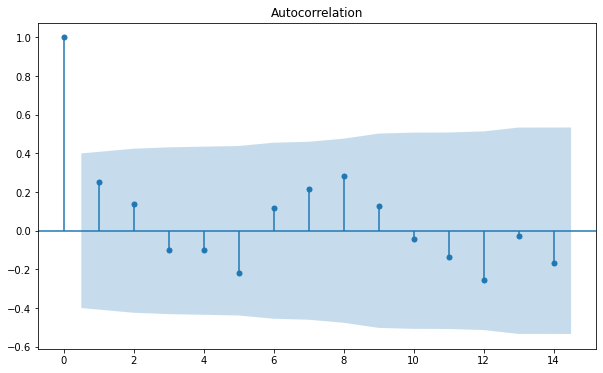

In [33]:
plot_acf(indexedDataset)
pyplot.show()

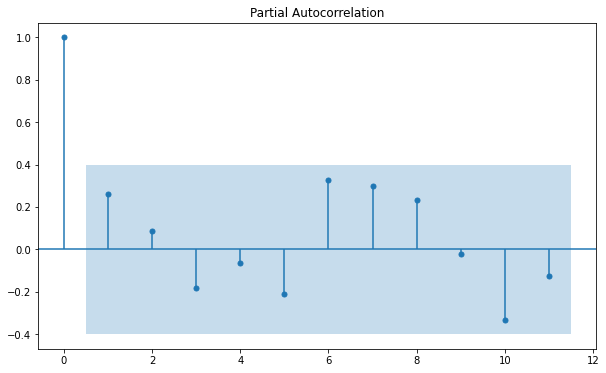

In [34]:
plot_pacf(indexedDataset, lags=11)
pyplot.show()

/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


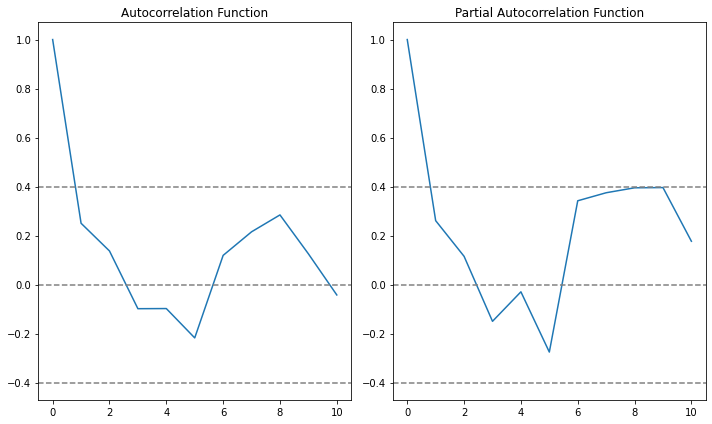

In [35]:
#ACF & PACF plots

lag_acf = acf(indexedDataset, nlags=10)
lag_pacf = pacf(indexedDataset, nlags=10, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()   

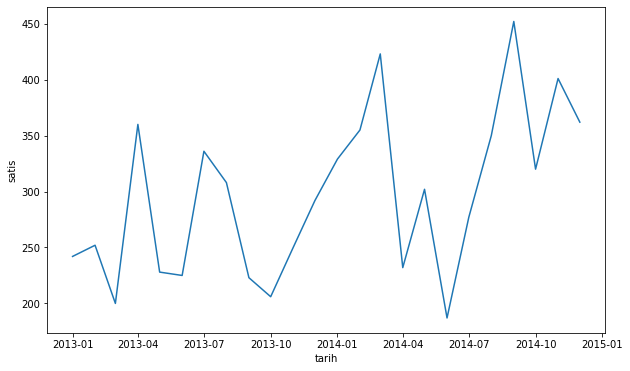

In [36]:
## plot graph
plt.xlabel('tarih')
plt.ylabel('satis')
plt.plot(indexedDataset)

In [37]:
#Determine rolling statistics
rolmean = indexedDataset.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            satis_miktari
tarihler                 
2013-01-01            NaN
2013-02-01            NaN
2013-03-01            NaN
2013-04-01            NaN
2013-05-01            NaN
2013-06-01            NaN
2013-07-01            NaN
2013-08-01            NaN
2013-09-01            NaN
2013-10-01            NaN
2013-11-01            NaN
2013-12-01     260.166667
2014-01-01     267.416667
2014-02-01     276.000000
2014-03-01     294.583333
2014-04-01     283.916667
2014-05-01     290.083333
2014-06-01     286.916667
2014-07-01     282.000000
2014-08-01     285.500000
2014-09-01     304.583333
2014-10-01     314.083333
2014-11-01     326.666667
2014-12-01     332.500000             satis_miktari
tarihler                 
2013-01-01            NaN
2013-02-01            NaN
2013-03-01            NaN
2013-04-01            NaN
2013-05-01            NaN
2013-06-01            NaN
2013-07-01            NaN
2013-08-01            NaN
2013-09-01            NaN
2013-10-01            NaN
2013-11-01  

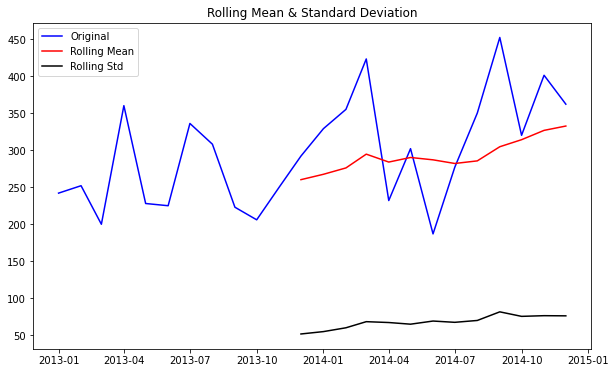

In [38]:
#Plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [39]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['satis_miktari'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -3.486455
p-value                         0.008342
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


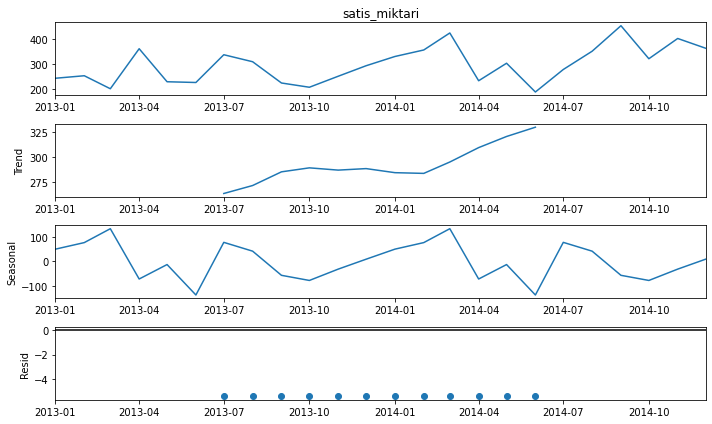

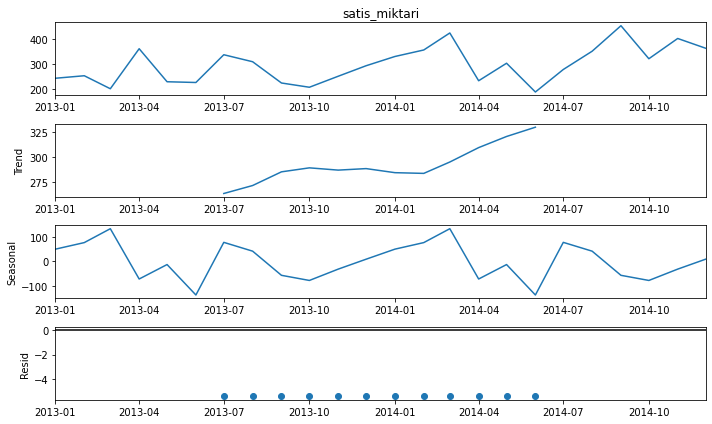

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(indexedDataset["satis_miktari"], model="add")
result.plot()
# sezonallik var

In [43]:
import pmdarima as pm
pm.auto_arima(indexedDataset["satis_miktari"], seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:                        SARIMAX   Log Likelihood                -136.790
Date:                Fri, 28 May 2021   AIC                            277.581
Time:                        23:16:44   BIC                            279.937
Sample:                             0   HQIC                           278.206
                                 - 24                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    296.3333     15.675     18.905      0.000     265.612     327.055
sigma2      5225.5556   2083.825      2.508      0.012    1141.333    9309.778
===================================================================================
Ljung-Box (L1) (Q):                   1.70   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.19   Prob(JB):                         0.55
Heteroskedasticity (H):               1.86   Skew:                             0.37
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(indexedDataset["satis_miktari"], order=(1,0,1), seasonal_order=(1,0,1,12) )
res = mod.fit(disp=False)
print(res.summary())

/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/eda/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                      satis_miktari   No. Observations:                   24
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -138.130
Date:                            Fri, 28 May 2021   AIC                            286.259
Time:                                    23:17:13   BIC                            292.149
Sample:                                01-01-2013   HQIC                           287.822
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9991      0.005    218.589      0.000       0.990       1.008
ma.L1         -0.7792      0.251   

In [45]:
pred = res.forecast(24) # gelecek iki sene tahmini
pred

2015-01-01    316.945992
2015-02-01    311.263045
2015-03-01    279.273162
2015-04-01    370.936791
2015-05-01    320.246145
2015-06-01    352.800232
2015-07-01    351.299888
2015-08-01    323.286184
2015-09-01    273.894604
2015-10-01    308.244200
2015-11-01    294.200281
2015-12-01    314.750522
2016-01-01    338.089682
2016-02-01    342.626063
2016-03-01    370.625166
2016-04-01    288.342345
2016-05-01    333.020936
2016-06-01    303.456823
2016-07-01    304.265158
2016-08-01    328.720316
2016-09-01    372.242130
2016-10-01    341.078479
2016-11-01    353.075818
2016-12-01    334.220250
Freq: MS, Name: predicted_mean, dtype: float64

In [64]:
res.predict() # data uzerinde tahmin gelecek değil mape hesaplamak icin hesaplandı

2013-01-01      0.000000
2013-02-01    231.150452
2013-03-01    241.316058
2013-04-01    226.074210
2013-05-01    265.485373
2013-06-01    255.224693
2013-07-01    247.442118
2013-08-01    267.904795
2013-09-01    276.706456
2013-10-01    264.221794
2013-11-01    250.860127
2013-12-01    250.310011
2014-01-01    263.819582
2014-02-01    278.050322
2014-03-01    317.039687
2014-04-01    281.858180
2014-05-01    319.838493
2014-06-01    316.647458
2014-07-01    245.376494
2014-08-01    262.750276
2014-09-01    313.931934
2014-10-01    350.594270
2014-11-01    326.946447
2014-12-01    327.121788
Freq: MS, Name: predicted_mean, dtype: float64

In [48]:
predictions_SARIMAX_diff = pd.Series(res.fittedvalues, copy=True)
print(predictions_SARIMAX_diff)
len(predictions_SARIMAX_diff)

tarihler
2013-01-01      0.000000
2013-02-01    231.150452
2013-03-01    241.316058
2013-04-01    226.074210
2013-05-01    265.485373
2013-06-01    255.224693
2013-07-01    247.442118
2013-08-01    267.904795
2013-09-01    276.706456
2013-10-01    264.221794
2013-11-01    250.860127
2013-12-01    250.310011
2014-01-01    263.819582
2014-02-01    278.050322
2014-03-01    317.039687
2014-04-01    281.858180
2014-05-01    319.838493
2014-06-01    316.647458
2014-07-01    245.376494
2014-08-01    262.750276
2014-09-01    313.931934
2014-10-01    350.594270
2014-11-01    326.946447
2014-12-01    327.121788
dtype: float64


24

In [49]:
#Convert to cumulative sum
predictions_SARIMAX_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_SARIMAX_diff_cumsum)

tarihler
2013-01-01       0.000000
2013-02-01     231.150452
2013-03-01     472.466510
2013-04-01     698.540720
2013-05-01     964.026093
2013-06-01    1219.250786
2013-07-01    1466.692904
2013-08-01    1734.597699
2013-09-01    2011.304155
2013-10-01    2275.525949
2013-11-01    2526.386076
2013-12-01    2776.696087
2014-01-01    3040.515669
2014-02-01    3318.565992
2014-03-01    3635.605679
2014-04-01    3917.463859
2014-05-01    4237.302353
2014-06-01    4553.949811
2014-07-01    4799.326305
2014-08-01    5062.076581
2014-09-01    5376.008514
2014-10-01    5726.602784
2014-11-01    6053.549232
2014-12-01    6380.671019
dtype: float64


In [50]:
predictions_SARIMAX_log = pd.Series(indexedDataset['satis_miktari'].iloc[0], index=indexedDataset.index)
predictions_SARIMAX_log = predictions_SARIMAX_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_SARIMAX_log.head()

tarihler
2013-01-01     242.000000
2013-02-01     473.150452
2013-03-01     714.466510
2013-04-01     940.540720
2013-05-01    1206.026093
dtype: float64

In [51]:
# Inverse of log is exp.
predictions_SARIMAX = np.exp(predictions_ARIMA_log)


/home/eda/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/eda/.local/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


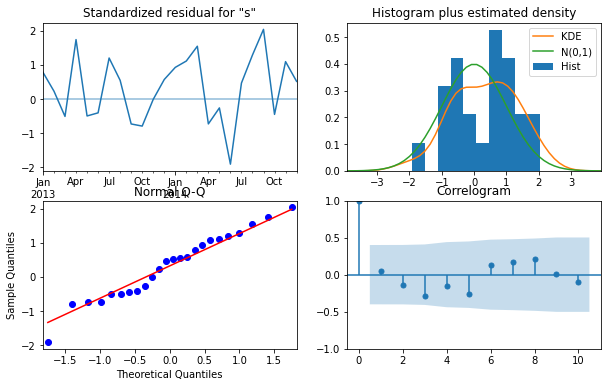

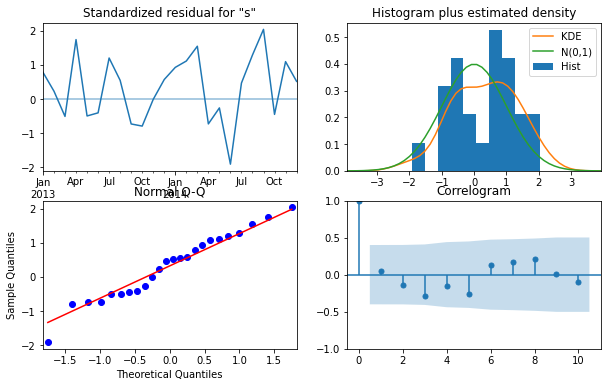

In [66]:
res.plot_diagnostics() # belki lazım olursa diye

In [129]:
test = indexedDataset["satis_miktari"]

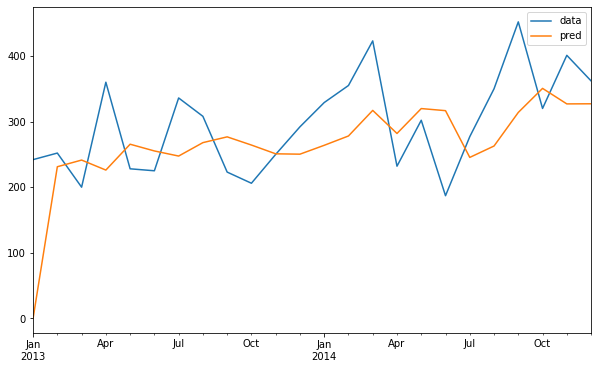

In [133]:
pd.DataFrame({'data':test,'pred':res.predict()}).plot();plt.show() # asıl data uzerinde prediction grafiği

In [52]:
x=res.forecast(steps=24)

In [53]:
x # 2 yıllık tahminler

2015-01-01    316.945992
2015-02-01    311.263045
2015-03-01    279.273162
2015-04-01    370.936791
2015-05-01    320.246145
2015-06-01    352.800232
2015-07-01    351.299888
2015-08-01    323.286184
2015-09-01    273.894604
2015-10-01    308.244200
2015-11-01    294.200281
2015-12-01    314.750522
2016-01-01    338.089682
2016-02-01    342.626063
2016-03-01    370.625166
2016-04-01    288.342345
2016-05-01    333.020936
2016-06-01    303.456823
2016-07-01    304.265158
2016-08-01    328.720316
2016-09-01    372.242130
2016-10-01    341.078479
2016-11-01    353.075818
2016-12-01    334.220250
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:>

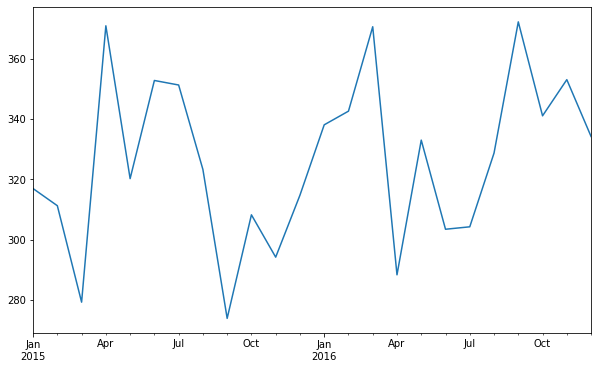

In [132]:
x.plot() # gelecek 24 ayın tahmin grafiği

In [54]:
# forecast error
forecast_errors = [satis["satis_miktari"][i]-predictions_ARIMA_diff[i] for i in range(len(satis))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [242.0, 20.84954843483328, -41.31605842324484, 133.925789925251, -37.485373345907476, -30.224692591126455, 88.55788177896045, 40.095204793306436, -53.706455830758784, -58.221793692948836, -0.8601274818809657, 41.68998933978841, 65.18041772304429, 76.94967766489168, 105.9603125192134, -49.858180245270546, -17.838493287282517, -129.6474580835661, 31.623505856088627, 87.24972416360418, 138.06806635771648, -30.59427000366327, 74.05355277268569, 34.87821240015495]


In [55]:
from statistics import mean
mean_forecast_error = mean(forecast_errors)

In [56]:
bias = sum(forecast_errors) * 1.0/len(satis)
print('Bias: %f' % bias)

Bias: 30.472041


In [57]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(satis["satis_miktari"], predictions_ARIMA_diff)
print('MAE: %f' % mae)

MAE: 67.951449


In [58]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(satis["satis_miktari"], predictions_ARIMA_diff)
print("MAPE: %f" %mape)

MAPE: 0.237570


In [59]:
top = 0
for i in range(len(satis)):
    top += abs((satis["satis_miktari"][i] - predictions_ARIMA_diff[i])/satis["satis_miktari"][i])
top /= len(satis)

In [60]:
top

0.237570249883126

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(satis["satis_miktari"], predictions_ARIMA_diff)
print('MSE: %f' % mse)

MSE: 7281.050937


In [62]:
import math
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 85.329074


In [63]:
# MAD
to = 0
for i in range(len(satis)):
    to += abs(satis["satis_miktari"][i] - predictions_ARIMA_diff[i])
to /= len(satis)
to

67.95144944646619